## Introduction 

This dataset looks at the baseball players, coaches, officials, and if they got inducted into the Baseball Hall of Fame (HOF). 

My aim is to look at the this data set, and answer the following questions 
1. The number of players that got inducted into the HOF
2. The distribution of time (attempts) it took them to get inducted. 
3. The fraction of players that got inducted into the HOF. 
4. Distribution of players, officials, managers, etc that got inducted into the HOF.
5. Number of HOF inductees per year. 

## Import the essential libraries and data

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Investigate the dataset 

In [124]:
df = pb.read_csv('HallOfFame.csv')

In [125]:
df.head(10)

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
5,lajoina01,1936,BBWAA,226.0,170.0,146.0,N,Player,NaN
6,speaktr01,1936,BBWAA,226.0,170.0,133.0,N,Player,NaN
7,youngcy01,1936,BBWAA,226.0,170.0,111.0,N,Player,NaN
8,hornsro01,1936,BBWAA,226.0,170.0,105.0,N,Player,NaN
9,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 9 columns):
playerID       4191 non-null object
yearID         4191 non-null int64
votedBy        4191 non-null object
ballots        3994 non-null float64
needed         3837 non-null float64
votes          3994 non-null float64
inducted       4191 non-null object
category       4191 non-null object
needed_note    157 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 294.8+ KB


In [127]:
df_hof = df.query('inducted == "Y"')

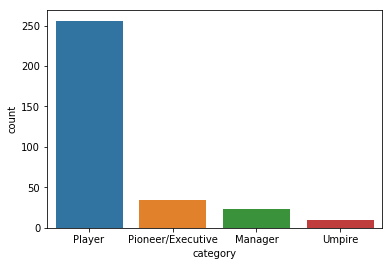

In [128]:
sns.countplot(x='category', data = df_hof);

## Divide the dataframe 

The data contains different categories with players, executive, managers, and umpires. For the purpose of this dataset, we will create two datasets and investigate them further. One dataset will contain only players, and the second dataset will have all the others. 

### Create dataframe for players and others

In [117]:
df_player = df.query('category == "Player"')
df_other = df.query('category != "Player"')

### Create a sub-dataframes to include only HOF Inductees

In [118]:
df_player_hof = df_player.query('inducted == "Y"')
df_other_hof = df_other.query('inducted == "Y"')

### Investigate the new dataframes

In [131]:
df_player_hof.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [129]:
df_player_hof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 4190
Data columns (total 9 columns):
playerID       256 non-null object
yearID         256 non-null int64
votedBy        256 non-null object
ballots        126 non-null float64
needed         123 non-null float64
votes          126 non-null float64
inducted       256 non-null object
category       256 non-null object
needed_note    3 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 20.0+ KB


In [120]:
df_other_hof.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
223,bulkemo99,1937,Centennial,NaN,NaN,NaN,Y,Pioneer/Executive,NaN
224,johnsba99,1937,Centennial,NaN,NaN,NaN,Y,Pioneer/Executive,NaN
225,mackco01,1937,Centennial,NaN,NaN,NaN,Y,Manager,NaN
226,mcgrajo01,1937,Veterans,NaN,NaN,NaN,Y,Manager,NaN
227,wrighge01,1937,Centennial,NaN,NaN,NaN,Y,Pioneer/Executive,NaN


In [121]:
df_other_hof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 223 to 4155
Data columns (total 9 columns):
playerID       67 non-null object
yearID         67 non-null int64
votedBy        67 non-null object
ballots        0 non-null float64
needed         0 non-null float64
votes          0 non-null float64
inducted       67 non-null object
category       67 non-null object
needed_note    0 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 5.2+ KB


### The number of attempts it takes a player to get inducted

#### Make a list consisting of players in the HOF with the number of times they appear on the ballot

In [132]:
#Make a list with players that got inducted into the HOF
ind_player = df_player_hof.playerID

In [110]:
#List of all the players
players = df_player.playerID

In [133]:
#We make a list of players that got into the HOF, based on the number of times
#they appear on the ballot. For example, if a player did not get elected in the 
#first attempt, but the third attempt, they will appear three times on the list
p_diffs = []
for i in ind_player:
    for j in players:
        if i == j:
            p_diffs.append(i)

In [112]:
#Get the number of times each player appeared on the ballot
p_diffs = np.array(p_diffs)
player_name, counts = np.unique(p_diffs, return_counts=True)

#### Make a dataframe with the HOF players and number of years on the ballot

In [134]:
#Make a dataframe with the players and the number of years on ballot
df_hof_years = pd.DataFrame(list(zip(player_name, counts)),columns =['Name', 'num_years']) 

In [114]:
df_hof_years.head(10)

,Name,num_years
0,aaronha01,1
1,alexape01,3
2,alomaro01,2
3,ansonca01,2
4,aparilu01,6
5,applilu01,8
6,ashburi01,16
7,averiea01,8
8,bagweje01,7
9,bakerfr01,13


#### Analyze the chances on a player getting into the HOF

First we look at the number of years it takes for a player to get into the HOF

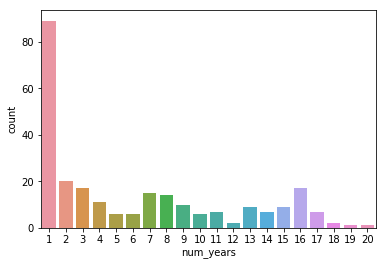

In [135]:
sns.countplot(x='num_years', data = df_hof_years);

Next, we look at the probability of a player getting into the HOF. This is the number of players that got elected to the HOF, vs the total number of players. 

In [116]:
#Chance of player getting into the HOF
df_player_hof.shape[0]/df_player.shape[0]

0.06296114117068372

We also look at the probability of a non-player nominee becoming an inductee.

In [122]:
#Chance of non-player into the HOF
df_other_hof.shape[0]/df_other.shape[0]

0.536

#### Summary

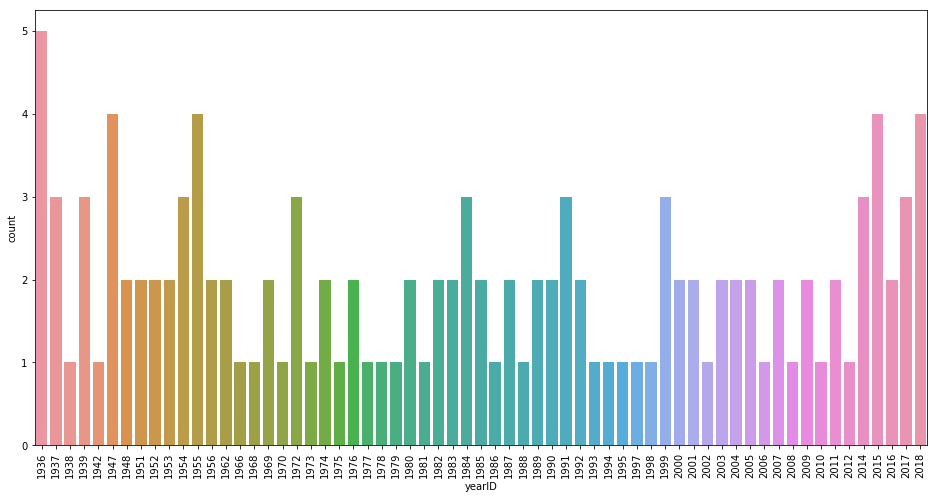

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x='yearID', data = df1);
plt.xticks(rotation=90);